In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [111]:
f_df = pd.read_csv('atp_transformed/2000-2024 players_3.csv')

C:\Users\Golbe\AppData\Local\Temp\ipykernel_15164\524445580.py:1: DtypeWarning: Columns (18,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  f_df = pd.read_csv('atp_transformed/2000-2024 players_3.csv')


In [124]:
# use this to reset full_df without reloading the data
full_df = f_df

In [ ]:
selected_features = [
    #'surface', 
    'tourney_level', 
    #'tourney_date', dropped because not numeric 
    'match_num', 
    'player_seed', 
    'player_height', 
    #'player_country', 
    'player_age', 
    # 'elo_pre_match', 
    # 'opponent_elo_pre_match', 
    #'opponent_rank', # dropped because of leakage 
    # 'mean_numb', 
    # 'median_numb', 
    # 'total_numb', 
    # 'mean_diff', 
    # 'median_diff', 
    # 'total_diff', 
    # 'mean_tb_numb', 
    # 'median_tb_numb', 
    # 'total_tb_numb', 
    # 'mean_tb_diff', 
    # 'median_tb_diff', 
    # 'total_tb_diff', 
    'days_of_experience',
    'career_year', 
    'rest_days', 
    'set_dominance', 
    'tb_dominance', 
    'highest_finish_position', 
    #'minutes_rolling_med_10', 
    #'draw_size_rolling_med_10', 
    #'highest_finish_position_rolling_med_10', 
    'ace_rolling_mean_10', 
    'double_faults_rolling_mean_10', 
    'points_on_serve_rolling_mean_10', 
    'first_serve_in_rolling_mean_10', 
    '1stWon_rolling_mean_10', 
    '2ndWon_rolling_mean_10', 
    'service_games_rolling_mean_10', 
    'break_points_saved_rolling_mean_10', 
    'break_points_faced_rolling_mean_10', 
    'elo_pre_match_rolling_mean_10', 
    'opponent_elo_pre_match_rolling_mean_10', 
    'set_dominance_rolling_mean_10', 
    'tb_dominance_rolling_mean_10', 
    #'player_rank_rolling_mean_10', # dropped because of leakage
    'mean_numb_rolling_mean_10', 
    'median_numb_rolling_mean_10', 
    'total_numb_rolling_mean_10', 
    'mean_diff_rolling_mean_10', 
    'median_diff_rolling_mean_10', 
    'total_diff_rolling_mean_10', 
    'mean_tb_numb_rolling_mean_10', 
    'median_tb_numb_rolling_mean_10', 
    'total_tb_numb_rolling_mean_10', 
    'mean_tb_diff_rolling_mean_10', 
    'median_tb_diff_rolling_mean_10', 
    'total_tb_diff_rolling_mean_10', 
    # 'elo',
    'filled_player_rank'
]

In [ ]:
# replace missing elo scores with default starting value
full_df['elo'] = full_df['elo'].replace(np.nan,1500)
full_df['rolling_opponent_elo'] = full_df['opponent_elo_pre_match_rolling_mean_10'].replace(np.nan,1500) 
full_df['rolling_elo'] = full_df['elo_pre_match_rolling_mean_10'].replace(np.nan,1500)

In [127]:
print(len(full_df))
# get subset
df_subset = full_df[selected_features]

# drop all values where nan
df_subset = df_subset.dropna()
print(len(df_subset))

1282807
54582


In [128]:
# encode non numeric values
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
surface_encoded = encoder.fit_transform(df_subset[[
    #'surface',
    #'player_country',
    'tourney_level'
    ]])
surface_df = pd.DataFrame(surface_encoded, 
                          columns=encoder.get_feature_names_out([
    #'surface',
    #'player_country',
    'tourney_level'
    ]),
                          index=df_subset.index)
df_encoded = pd.concat([df_subset.drop([
    #'surface',
    #'player_country',
    'tourney_level'
    ], axis=1), surface_df], axis=1)

# df_encoded = df_subset

In [129]:
# prepare data
X = df_encoded.drop('filled_player_rank', axis=1)  # Features
y = df_encoded['filled_player_rank']  # Target

In [130]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# scale features to normalise
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# train
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [133]:
# predict
y_pred = knn.predict(X_test_scaled)

In [134]:
# metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

print(f"Min: {y.min()}")
print(f"Max: {y.max()}")
print(f"Range: {y.max() - y.min()}")
print(f"Mean: {y.mean()}")
print(f"Std: {y.std()}")

# Check if there's overfitting
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")

R² Score: 0.7607
Mean Absolute Error: 53.4696
Root Mean Squared Error: 96.8702
Min: 1.0
Max: 2268.0
Range: 2267.0
Mean: 213.17529588509032
Std: 203.85708513317002
Train R²: 0.8234
Test R²: 0.7607


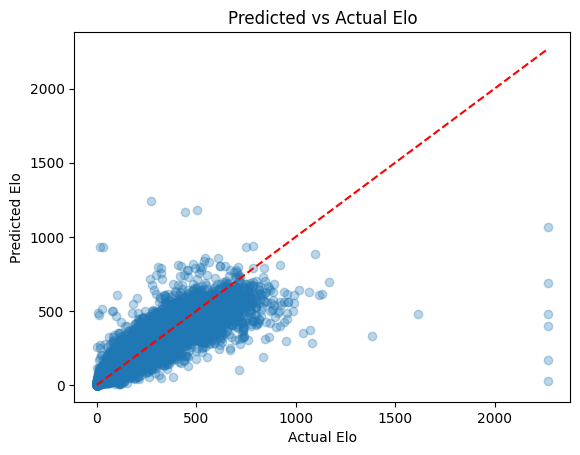

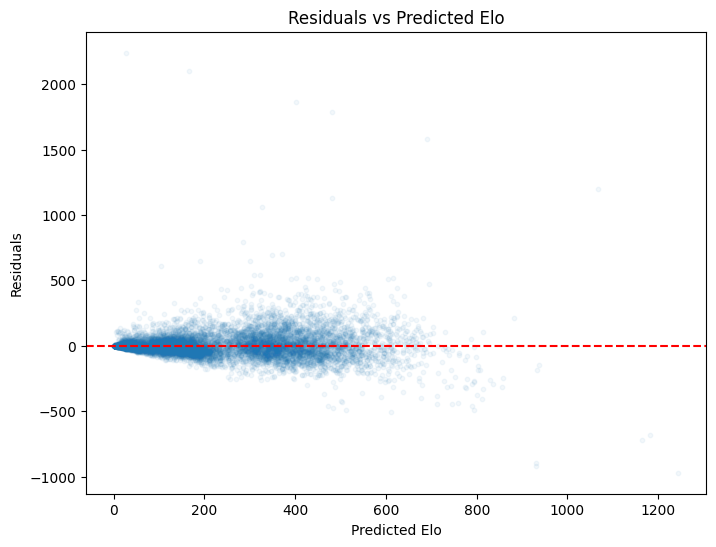

In [135]:
y_true = y_test

# Assuming y_true and y_pred are already numpy arrays
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel('Actual Elo')
plt.ylabel('Predicted Elo')
plt.title('Predicted vs Actual Elo')
plt.show()

# Residuals
residuals = y_true - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.05, s=10)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Elo')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Elo')
plt.show()